In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'Dataset\driver - driver.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21064\470369713.py:3: DtypeWarning: Columns (7,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Dataset\driver - driver.csv')


In [2]:
print(df.head(2))
print(df.shape)
print(df.columns)


   vehicle_id  year        make      model             class drive  \
0       26587  1984  Alfa Romeo  GT V6 2.5  Minicompact Cars   NaN   
1       27705  1984  Alfa Romeo  GT V6 2.5  Minicompact Cars   NaN   

     transmission transmission_type  engine_index engine_descriptor  ...  \
0  Manual 5-Speed               NaN          9001             (FFS)  ...   
1  Manual 5-Speed               NaN          9005    (FFS) CA model  ...   

   hours_to_charge_ac_240v  composite_city_mpg composite_highway_mpg  \
0                      0.0                   0                     0   
1                      0.0                   0                     0   

   composite_combined_mpg range_ft1 city_range_ft1  highway_range_ft1  \
0                       0         0            0.0                0.0   
1                       0         0            0.0                0.0   

   range_ft2  city_range_ft2  highway_range_ft2  
0        NaN             0.0                0.0  
1        NaN           

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 


In [7]:
df.describe(include='object')

,make,model,class,drive,transmission,transmission_type,engine_descriptor,turbocharger,fuel_type,fuel_type_1,gas_guzzler_tax,my_mpg_data,alternative_fuel_technology
count,38113,38113,38113,36924,38102,15045,22693,5239,38113,38113,964,38113,3047
unique,133,3748,34,7,46,52,544,1,14,6,1,2,8
top,Chevrolet,F150 Pickup 2WD,Compact Cars,Front-Wheel Drive,Automatic 4-Speed,CLKUP,(FFS),True,Regular,Regular Gasoline,True,N,FFV
freq,3810,209,5508,13351,11042,7809,8827,5239,25258,26531,964,25552,1345


In [8]:
print(df.describe(include='number'))

         vehicle_id          year  engine_index  engine_cylinders  \
count  38113.000000  38113.000000  38113.000000      37977.000000   
mean   19170.638496   2000.194527   8799.389001          5.736656   
std    11134.878665     10.464573  17781.058490          1.752254   
min        1.000000   1984.000000      0.000000          2.000000   
25%     9529.000000   1991.000000      0.000000          4.000000   
50%    19058.000000   2001.000000    212.000000          6.000000   
75%    28779.000000   2009.000000   4451.000000          6.000000   
max    38542.000000   2017.000000  69102.000000         16.000000   

       engine_displacement  supercharger  fuel_type_2  city_mpg_ft1  \
count         37979.000000           0.0          0.0  38113.000000   
mean              3.317583           NaN          NaN     17.981109   
std               1.361995           NaN          NaN      6.849728   
min               0.000000           NaN          NaN      6.000000   
25%               2.200

In [4]:
print(df.isnull().sum()[df.isnull().sum() > 0])


drive                           1189
transmission                      11
transmission_type              23068
engine_descriptor              15420
engine_cylinders                 136
engine_displacement              134
turbocharger                   32874
supercharger                   38113
fuel_type_2                    38113
gas_guzzler_tax                37149
start_stop_technology          38113
alternative_fuel_technology    35066
electric_motor                 38113
manufacturer_code              38113
vehicle_charger                38113
alternate_charger              38113
range_ft2                      38113
dtype: int64


In [5]:
le = LabelEncoder()
for col in ['make','transmission','drive','model','turbocharger','gas_guzzler_tax','transmission_type','class','fuel_type','my_mpg_data','engine_descriptor','alternative_fuel_technology','my_mpg_data','gasoline_electricity_blended_cd']:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=[])
df.head()

,vehicle_id,year,make,model,class,drive,transmission,transmission_type,engine_index,engine_descriptor,...,hours_to_charge_ac_240v,composite_city_mpg,composite_highway_mpg,composite_combined_mpg,range_ft1,city_range_ft1,highway_range_ft1,range_ft2,city_range_ft2,highway_range_ft2
0,26587,1984,3,1788,5,7,42,52,9001,64,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,3,1788,5,7,42,52,9005,86,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,3,3126,29,7,42,52,9002,64,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,3,3126,29,7,42,52,9006,86,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,0,1260,15,0,30,52,1830,64,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38113 entries, 0 to 38112
Data columns (total 81 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vehicle_id                         38113 non-null  int64  
 1   year                               38113 non-null  int64  
 2   make                               38113 non-null  int32  
 3   model                              38113 non-null  int32  
 4   class                              38113 non-null  int32  
 5   drive                              38113 non-null  int32  
 6   transmission                       38113 non-null  int32  
 7   transmission_type                  38113 non-null  int32  
 8   engine_index                       38113 non-null  int64  
 9   engine_descriptor                  38113 non-null  int32  
 10  engine_cylinders                   37977 non-null  float64
 11  engine_displacement                37979 non-null  flo

In [6]:
df = df.drop(['vehicle_id','fuel_type_2','fuel_type_1','engine_index'], axis=1)

In [7]:
# Fill null values in 'engine_cylinders' and 'engine_displacement' with the mean
df['engine_cylinders'].fillna(df['engine_cylinders'].mean(), inplace=True)
df['engine_displacement'].fillna(df['engine_displacement'].mean(), inplace=True)

columns_to_fill_zero = ['supercharger', 'start_stop_technology', 'electric_motor', 'manufacturer_code', 'vehicle_charger', 'alternate_charger', 'range_ft2']
df[columns_to_fill_zero] = df[columns_to_fill_zero].fillna(0)

# Verify the changes
print(df[['engine_cylinders', 'engine_displacement', 'supercharger', 'start_stop_technology', 'electric_motor', 'manufacturer_code', 'vehicle_charger', 'alternate_charger', 'range_ft2']].isnull().sum())

engine_cylinders         0
engine_displacement      0
supercharger             0
start_stop_technology    0
electric_motor           0
manufacturer_code        0
vehicle_charger          0
alternate_charger        0
range_ft2                0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21064\4205573669.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine_cylinders'].fillna(df['engine_cylinders'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21064\4205573669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

<Axes: >

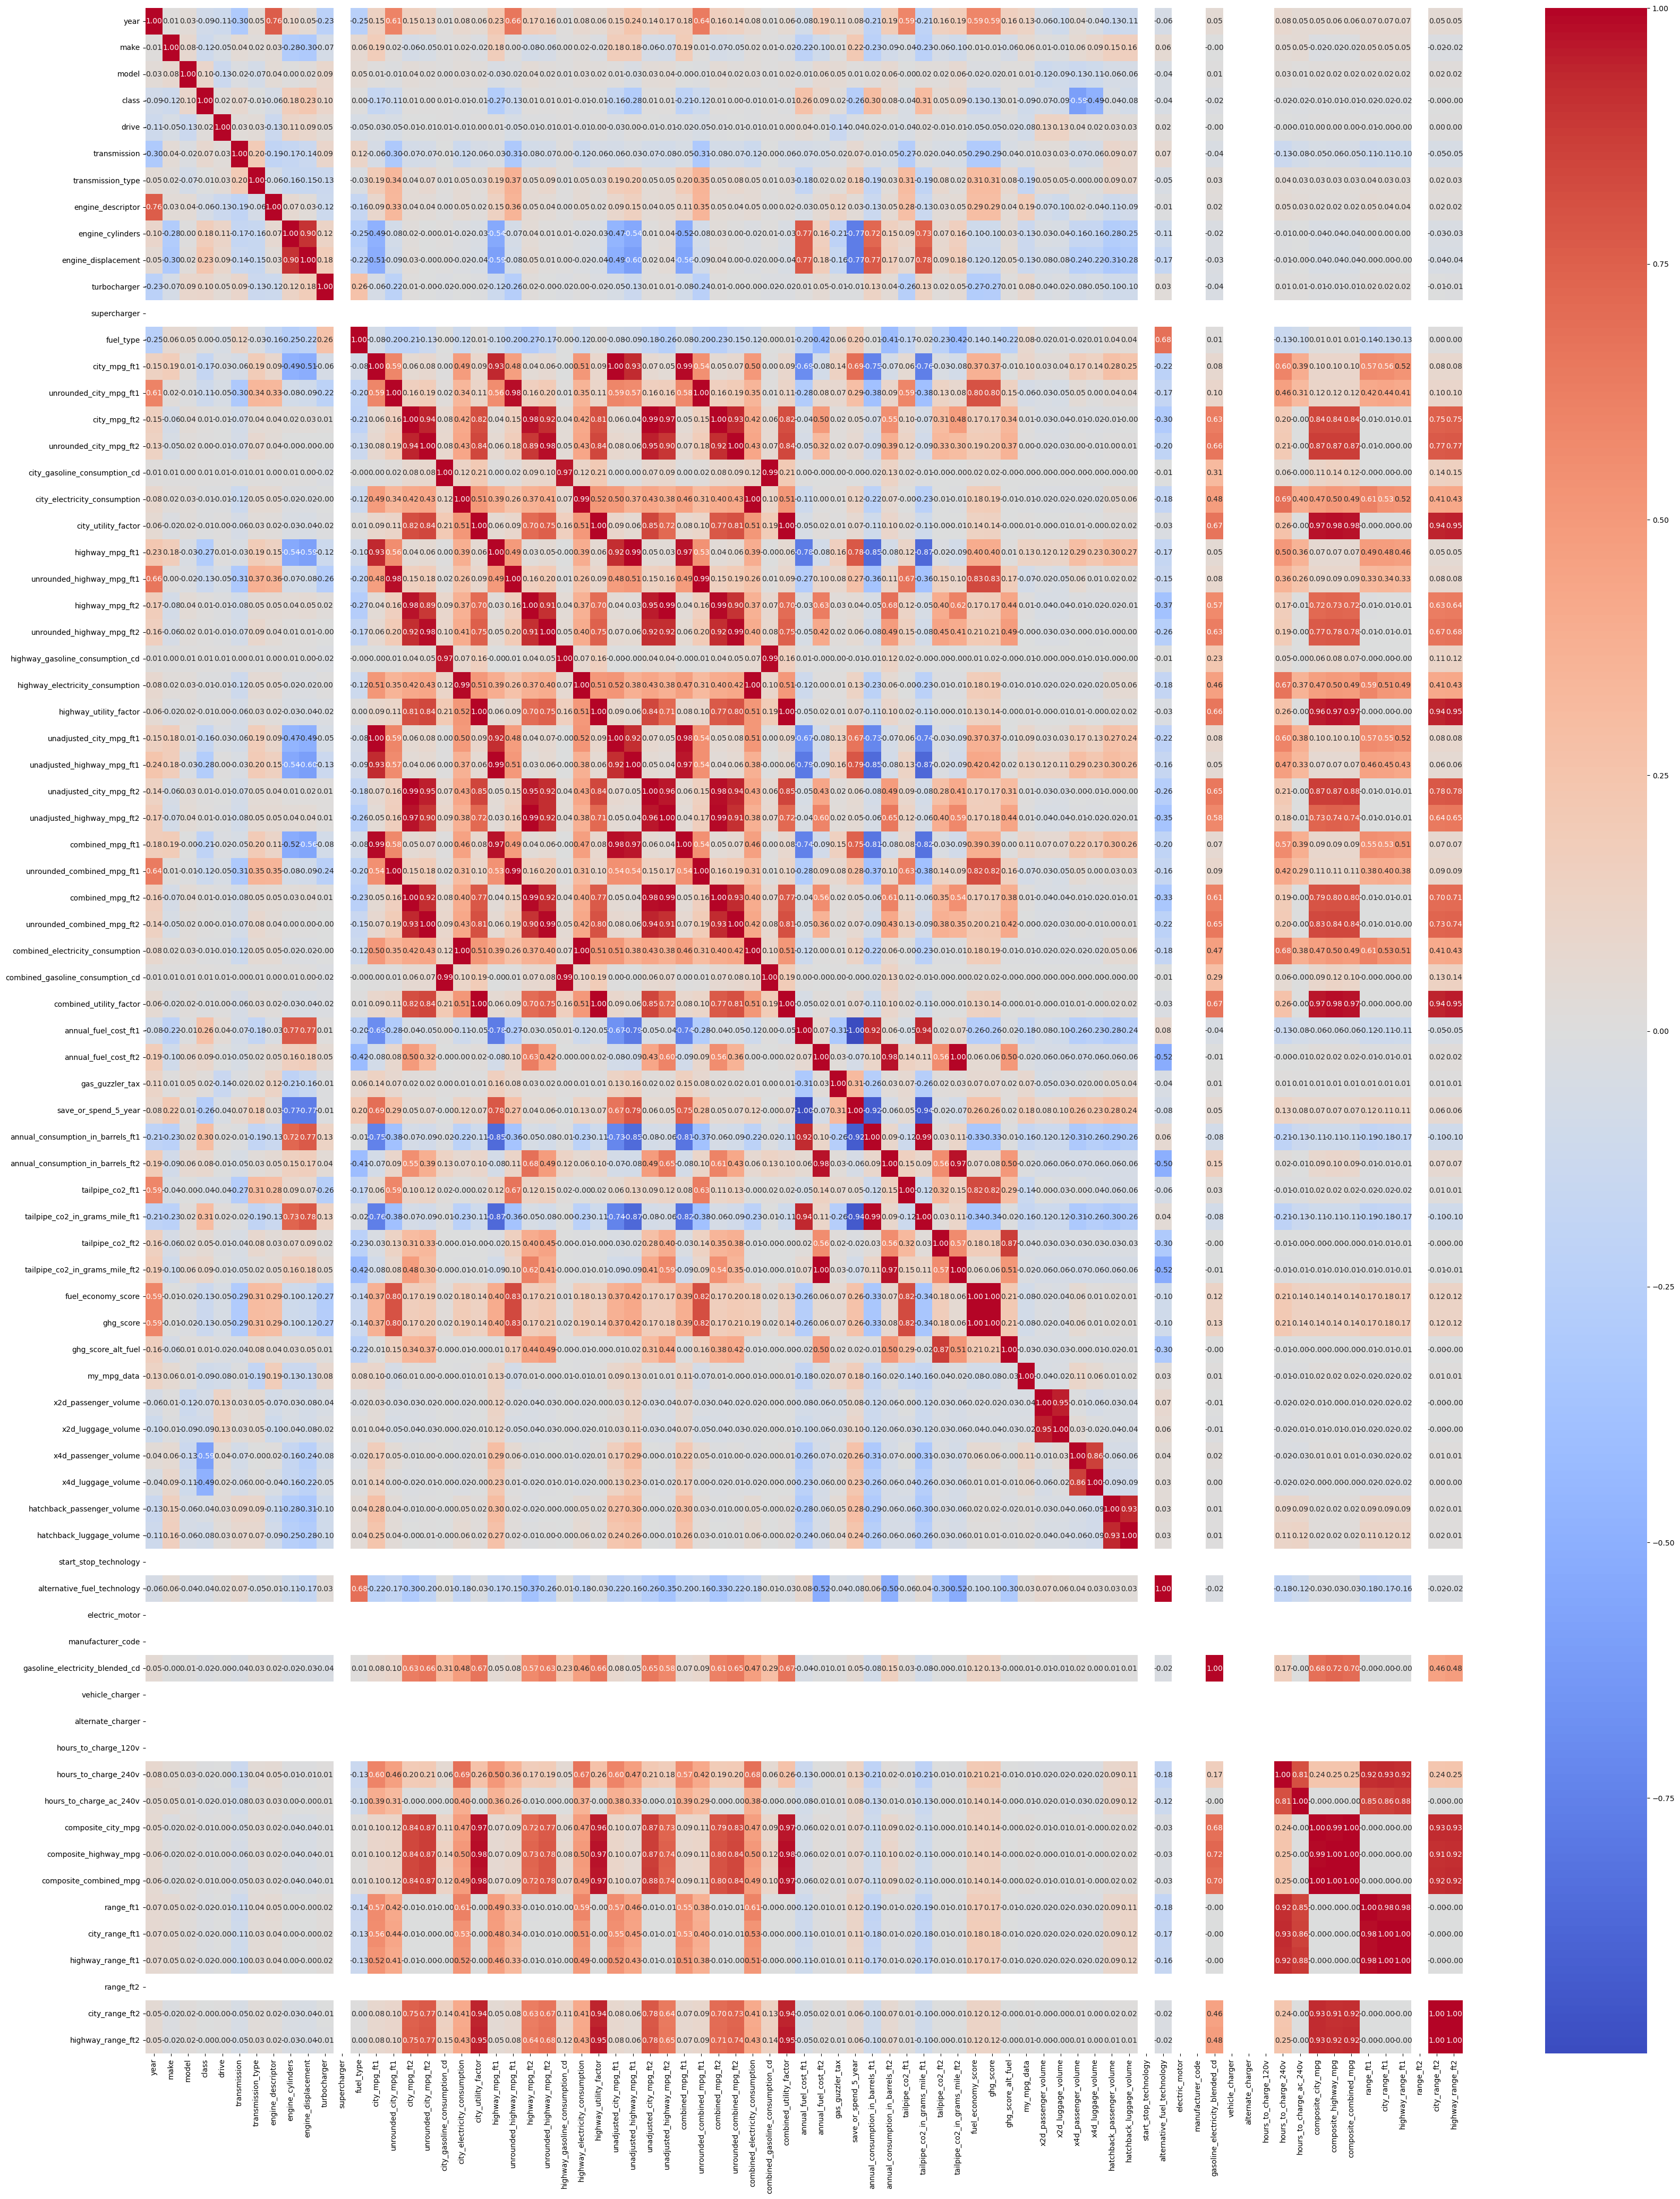

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaN values with 0
df = df.fillna(0)
plt.figure(figsize=(40, 50))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


In [12]:
from sklearn.decomposition import PCA
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

pca = PCA()
principal_components = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


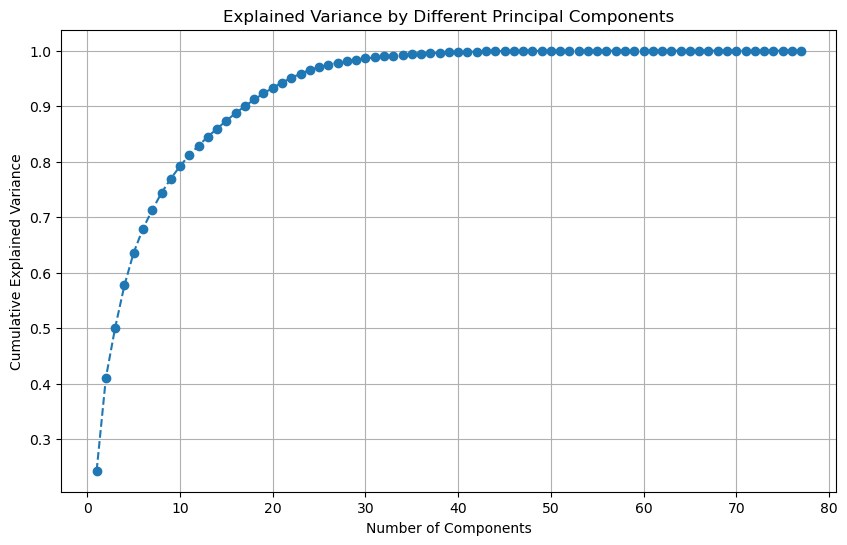

Explained variance ratio by each component: [2.42738305e-01 1.67632712e-01 9.04565492e-02 7.62825424e-02
 5.90745086e-02 4.30483957e-02 3.37458429e-02 3.07027781e-02
 2.58195230e-02 2.23221305e-02 2.03905170e-02 1.66493794e-02
 1.61960382e-02 1.45390964e-02 1.44015758e-02 1.35579664e-02
 1.25503975e-02 1.19513858e-02 1.08871040e-02 1.01713194e-02
 9.52221985e-03 8.44845046e-03 7.41004797e-03 7.10558923e-03
 4.72046303e-03 4.31857856e-03 3.96050187e-03 3.20402607e-03
 2.24821745e-03 2.07854128e-03 1.84887783e-03 1.75377962e-03
 1.48297340e-03 1.16061880e-03 1.13148895e-03 9.58636503e-04
 9.12165621e-04 8.82120504e-04 6.50525075e-04 5.69492606e-04
 5.29862136e-04 4.93194394e-04 4.34228122e-04 2.11122524e-04
 1.75379941e-04 1.27817900e-04 1.22448193e-04 1.07513637e-04
 6.78580484e-05 6.10049694e-05 5.33450314e-05 2.80981766e-05
 2.51312826e-05 1.84719721e-05 1.69377614e-05 1.28700735e-05
 1.14811914e-05 4.47313841e-06 3.19754174e-06 2.89922895e-06
 2.28304487e-06 1.89095426e-06 1.27936860

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()
print("Explained variance ratio by each component:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

In [14]:
df_scaled = np.nan_to_num(df_scaled)
df_scaled

array([[-1.54757764, -1.57666304, -0.09865047, ...,  0.        ,
        -0.03352597, -0.03425343],
       [-1.54757764, -1.57666304, -0.09865047, ...,  0.        ,
        -0.03352597, -0.03425343],
       [-1.54757764, -1.57666304,  1.18970734, ...,  0.        ,
        -0.03352597, -0.03425343],
       ...,
       [ 1.60596076,  1.87379592,  1.64997269, ...,  0.        ,
        -0.03352597, -0.03425343],
       [ 1.60596076,  1.87379592,  1.65093559, ...,  0.        ,
        10.51838353, 11.3404046 ],
       [ 1.60596076,  1.87379592,  1.65189849, ...,  0.        ,
        -0.03352597, -0.03425343]])

In [15]:
df_scaled = df_scaled[~np.isnan(df_scaled).any(axis=1)]
df_scaled = df_scaled[~np.isinf(df_scaled).any(axis=1)]

In [16]:
optimal_components = 6
pca_optimal = PCA(n_components=optimal_components)
df_pca_optimal = pca_optimal.fit_transform(df_scaled)
df_pca_optimal = pd.DataFrame(data=df_pca_optimal, columns=[f'PC{i+1}' for i in range(df_pca_optimal.shape[1])])



In [17]:

df_pca_optimal.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.815821,-0.217033,-1.616937,0.099584,-0.978015,0.024165
1,-0.812649,-0.212524,-1.605185,0.095234,-0.960954,0.023261
2,-0.643034,0.094375,-1.665219,0.010296,-1.254195,0.087367
3,-0.639861,0.098883,-1.653467,0.005946,-1.237134,0.086463
4,-1.109266,-1.162918,-0.982353,0.584936,-0.417372,-0.068023


In [21]:
pca_df = PCA(n_components=3)
df_pca = pca_df.fit_transform(df_scaled)
df_pca= pd.DataFrame(data=df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])



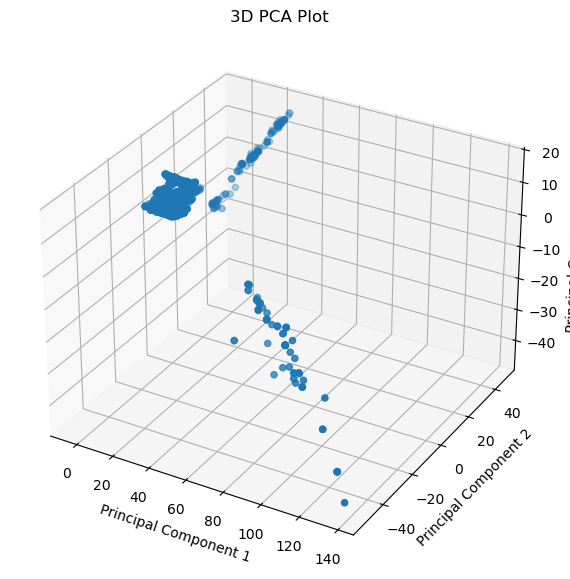

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')

plt.show()

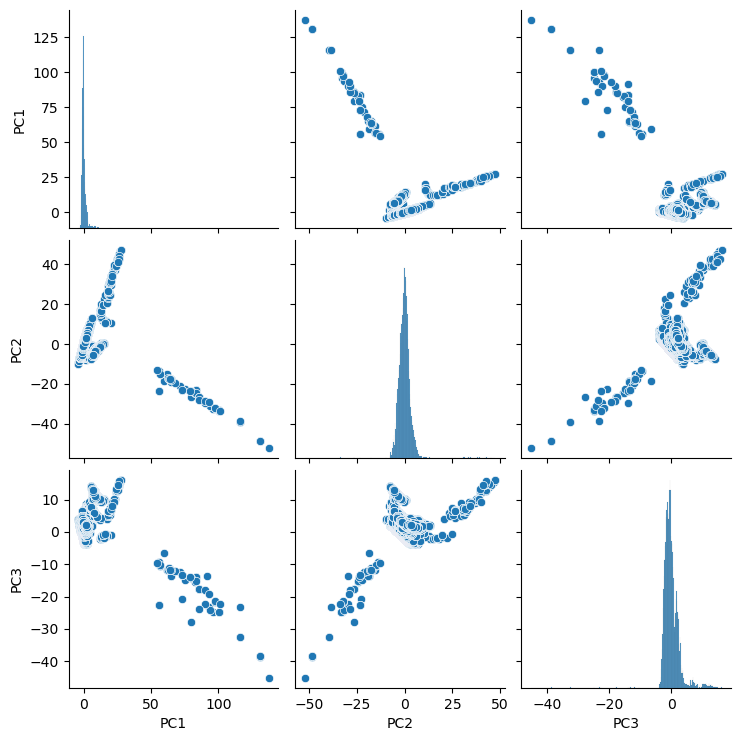

In [23]:
sns.pairplot(df_pca)

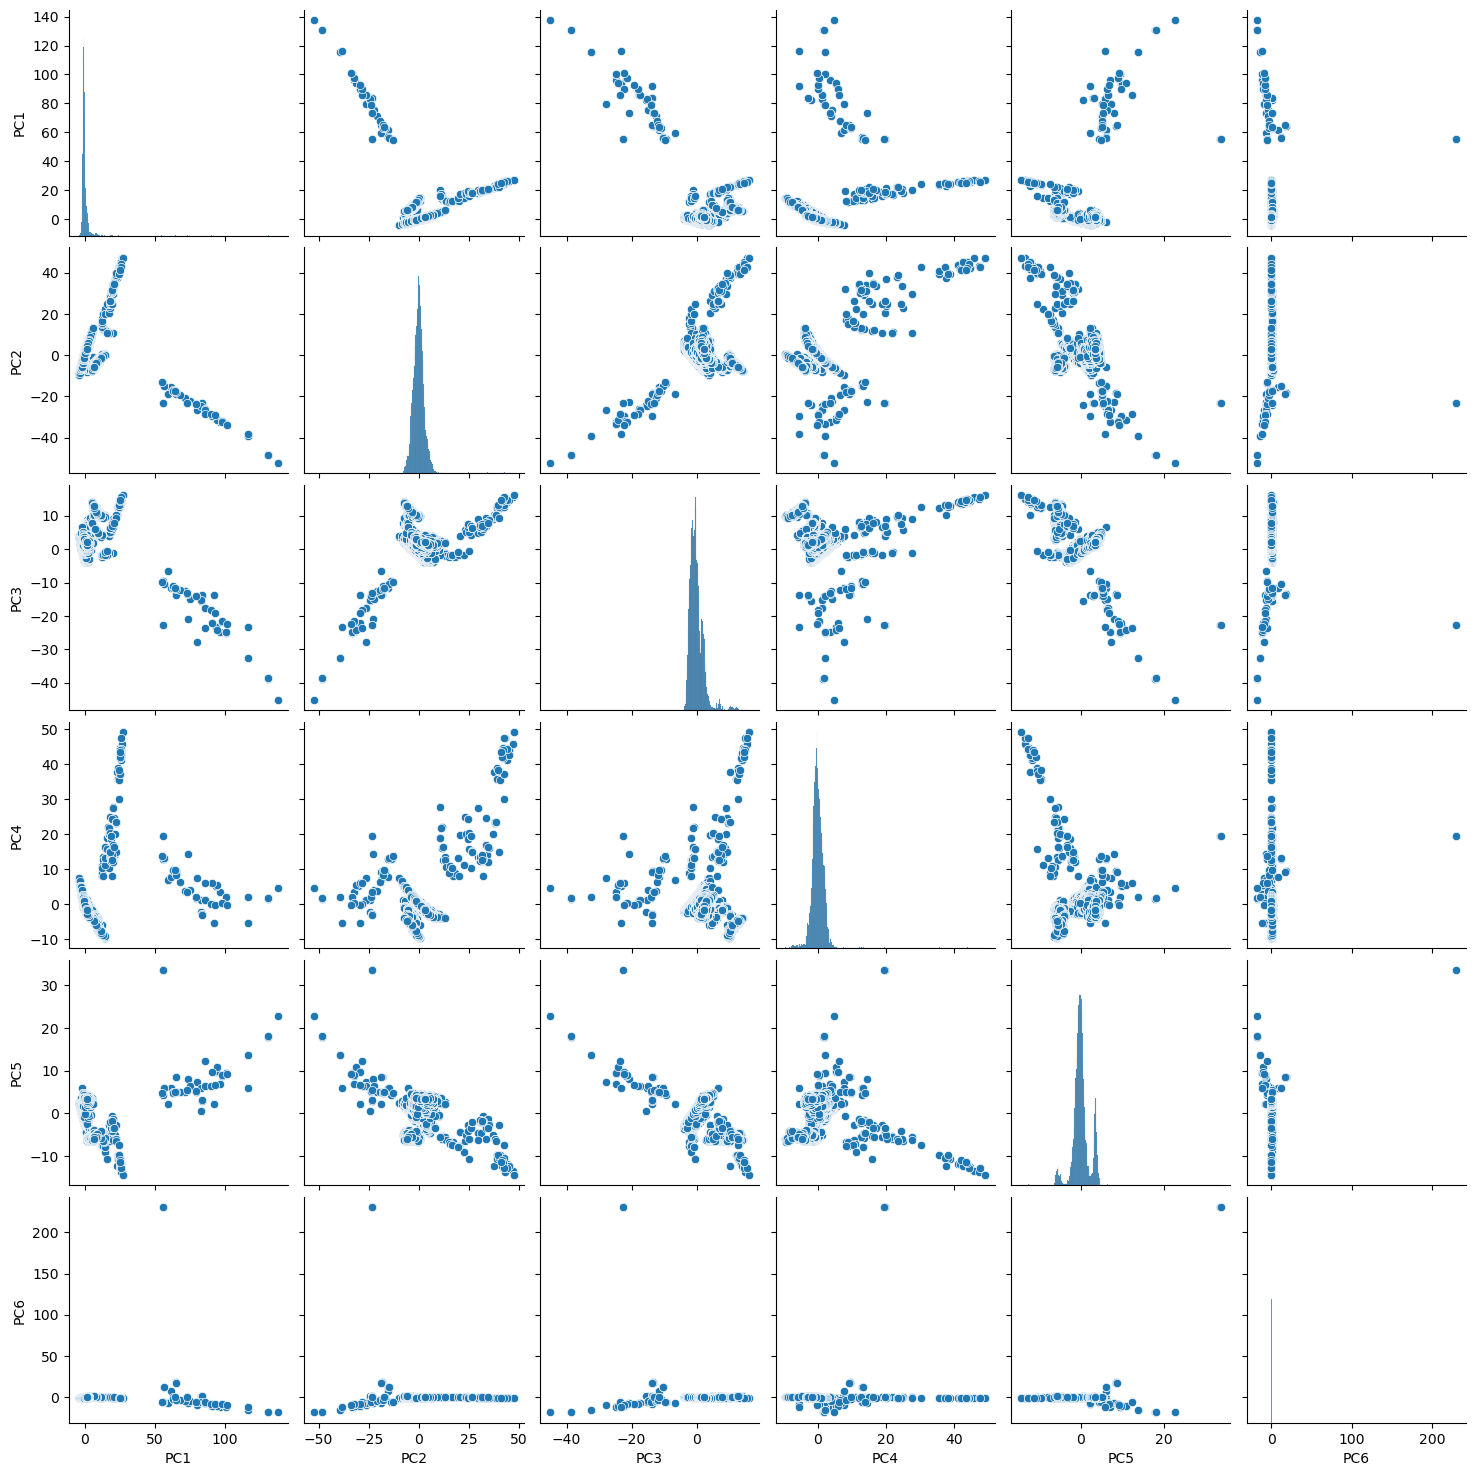

In [ ]:
sns.pairplot(df_pca_optimal)

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
KMeans = KMeans(n_clusters=3)
cluster_with_pca = KMeans.fit_predict(df_pca)
cluster_with_pca_optimal = KMeans.fit_predict(df_pca_optimal)
cluster_with_df = KMeans.fit_predict(df_scaled)
score_with_pca = silhouette_score(df_pca, cluster_with_pca)
score_with_pca_optimal = silhouette_score(df_pca_optimal, cluster_with_pca_optimal)
score_with_df = silhouette_score(df_scaled, cluster_with_df)



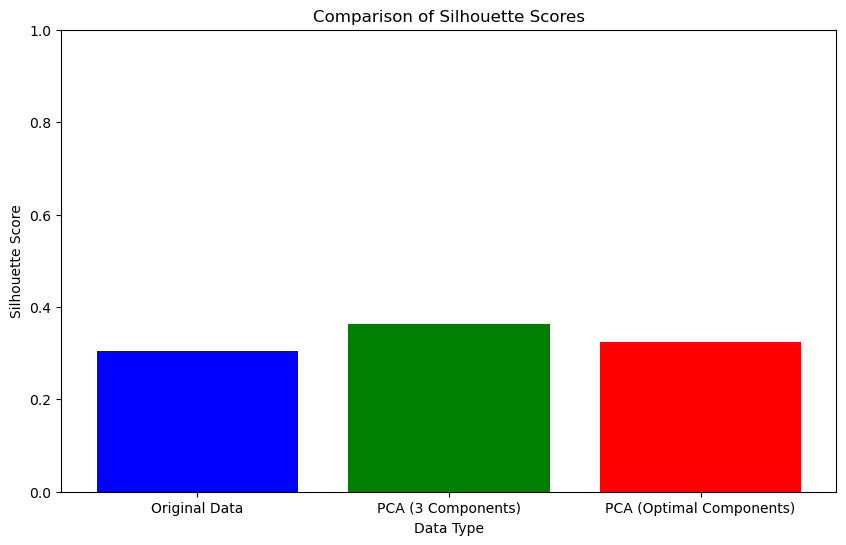

In [25]:
scores = {
    'Original Data': score_with_df,
    'PCA (3 Components)': score_with_pca,
    'PCA (Optimal Components)': score_with_pca_optimal
}

plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Data Type')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.ylim(0, 1)
plt.show()